# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | machico
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | vammala
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | barclayville
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ambovombe
Processing Record 17 of Set 1 | severo-yeniseyskiy
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | egilsstadir
Processing Record 21 of Set 1 | olonkinbyen
Processi

Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | marabba
Processing Record 39 of Set 4 | kamloops
Processing Record 40 of Set 4 | al ghayzah
Processing Record 41 of Set 4 | nova sintra
Processing Record 42 of Set 4 | wake forest
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | tavda
Processing Record 45 of Set 4 | kailua-kona
Processing Record 46 of Set 4 | kapa'a
Processing Record 47 of Set 4 | sodankyla
Processing Record 48 of Set 4 | sebastopol
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | brasileia
Processing Record 1 of Set 5 | fort st. john
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | hanceville
Processing Record 4 of Set 5 | tilcara
Processing Record 5 of Set 5 | inongo
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | huarmey
Processing Record 8 of Set 5 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 9 of Set 5 | zy

Processing Record 29 of Set 8 | taulaga
Processing Record 30 of Set 8 | usogorsk
Processing Record 31 of Set 8 | tralee
Processing Record 32 of Set 8 | berezovyy
Processing Record 33 of Set 8 | new kensington
Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | sosnogorsk
Processing Record 36 of Set 8 | cidreira
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | laminusa
Processing Record 39 of Set 8 | huaral
Processing Record 40 of Set 8 | liwale
Processing Record 41 of Set 8 | veranopolis
Processing Record 42 of Set 8 | mkushi
Processing Record 43 of Set 8 | daru
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | campo grande
Processing Record 46 of Set 8 | tchibanga
Processing Record 47 of Set 8 | emet
Processing Record 48 of Set 8 | monte llano
City not found. Skipping...
Processing Record 49 of Set 8 | abrama
City not found. Skipping...
Processing Record 0 of Set 9 | albertina
Processing Record 1 of Set 9 | muramvya
Pr

Processing Record 20 of Set 12 | pass christian
Processing Record 21 of Set 12 | nishinoomote
Processing Record 22 of Set 12 | pangoa
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | falam
Processing Record 25 of Set 12 | greenville
Processing Record 26 of Set 12 | kuqa
Processing Record 27 of Set 12 | akrehamn
Processing Record 28 of Set 12 | raja
Processing Record 29 of Set 12 | rondonopolis
Processing Record 30 of Set 12 | yeniseysk
Processing Record 31 of Set 12 | petauke
Processing Record 32 of Set 12 | prince albert
Processing Record 33 of Set 12 | chodziez
Processing Record 34 of Set 12 | bikenibeu village
Processing Record 35 of Set 12 | aksaray
Processing Record 36 of Set 12 | choyr
Processing Record 37 of Set 12 | sofifi
City not found. Skipping...
Processing Record 38 of Set 12 | gerash
Processing Record 39 of Set 12 | dwarka
Processing Record 40 of Set 12 | magdagachi
Processing Record 41 of Set 12 | ashgabat
Processing Record 42 of Set 12 | ciuda

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,73.24,80,99,36.13,PN,1689875182
1,lebu,-37.6167,-73.6500,54.57,97,100,21.59,CL,1689875182
2,port-aux-francais,-49.3500,70.2167,35.56,60,64,37.47,TF,1689875182
3,port elizabeth,-33.9180,25.5701,53.89,54,75,10.36,ZA,1689874954
4,afaahiti,-17.7500,-149.2833,73.27,66,65,19.19,PF,1689875183


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.24,80,99,36.13,PN,1689875182
1,lebu,-37.6167,-73.6500,54.57,97,100,21.59,CL,1689875182
2,port-aux-francais,-49.3500,70.2167,35.56,60,64,37.47,TF,1689875182
3,port elizabeth,-33.9180,25.5701,53.89,54,75,10.36,ZA,1689874954
4,afaahiti,-17.7500,-149.2833,73.27,66,65,19.19,PF,1689875183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

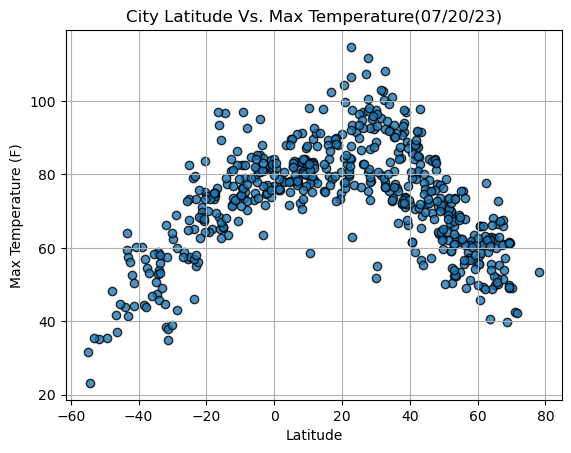

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

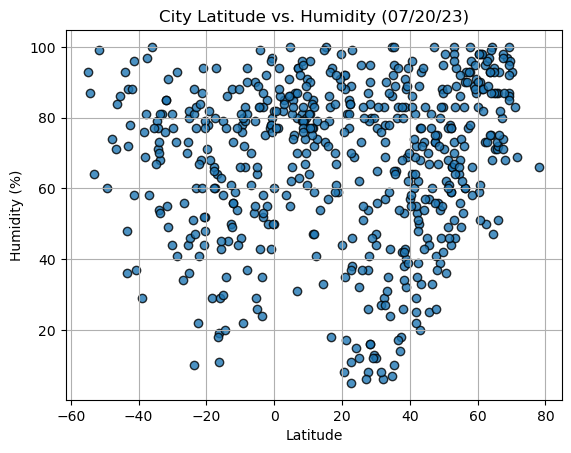

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

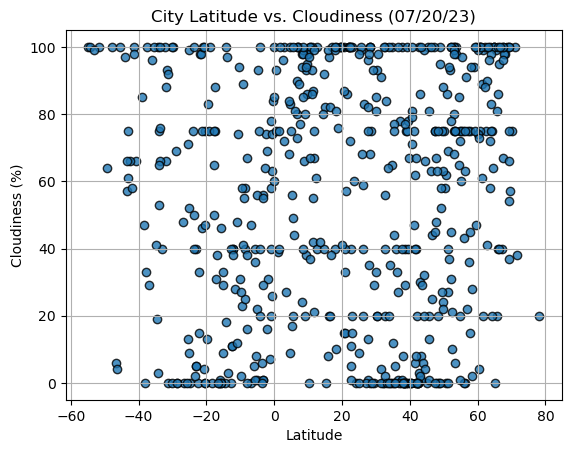

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

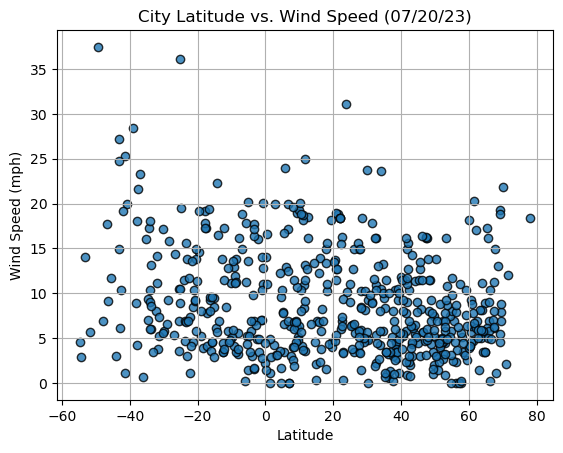

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):

    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,machico,32.7000,-16.7667,76.71,69,40,16.11,PT,1689875183
10,vammala,61.3333,22.9000,61.57,88,89,4.63,FI,1689875184
11,kingston,17.9970,-76.7936,88.75,70,40,14.97,JM,1689874962
12,barclayville,4.6797,-8.2339,78.13,86,83,9.60,LR,1689875184
13,albany,42.6001,-73.9662,84.81,50,3,1.99,US,1689875126


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.24,80,99,36.13,PN,1689875182
1,lebu,-37.6167,-73.6500,54.57,97,100,21.59,CL,1689875182
2,port-aux-francais,-49.3500,70.2167,35.56,60,64,37.47,TF,1689875182
3,port elizabeth,-33.9180,25.5701,53.89,54,75,10.36,ZA,1689874954
4,afaahiti,-17.7500,-149.2833,73.27,66,65,19.19,PF,1689875183


###  Temperature vs. Latitude Linear Regression Plot

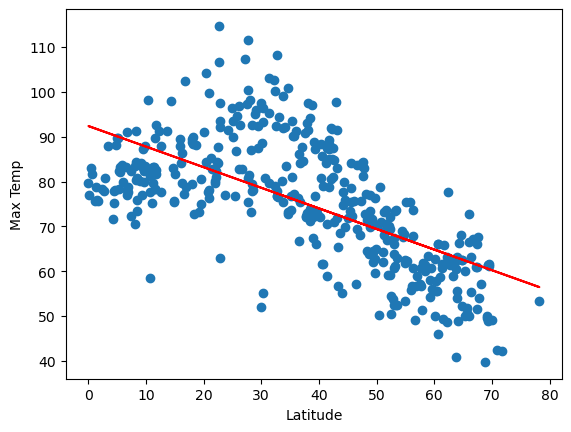

In [32]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

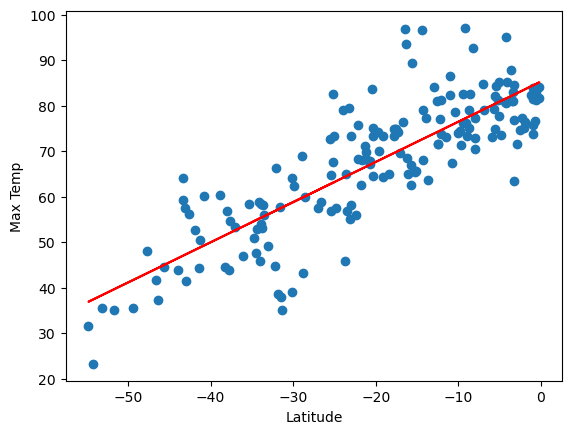

In [33]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 
There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of  on Northern Hemisphere.
There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of  on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

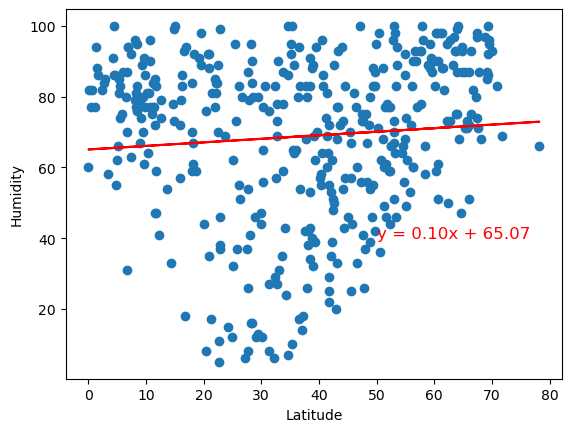

In [34]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

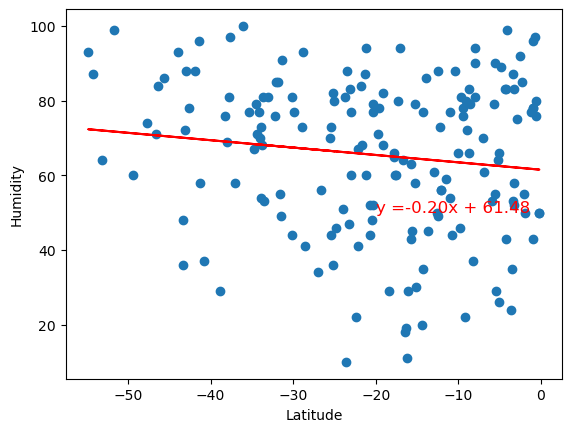

In [35]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 
There is a slightly positive correlation between humidity and latitude on Northern Hemisphere.
There is a slightly negative correlation correlation between humidity and latitude on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

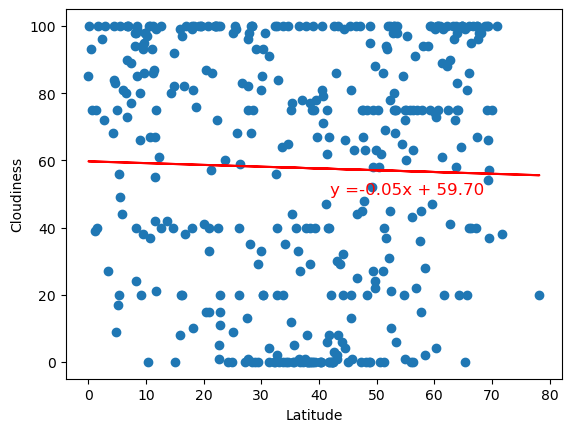

In [36]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

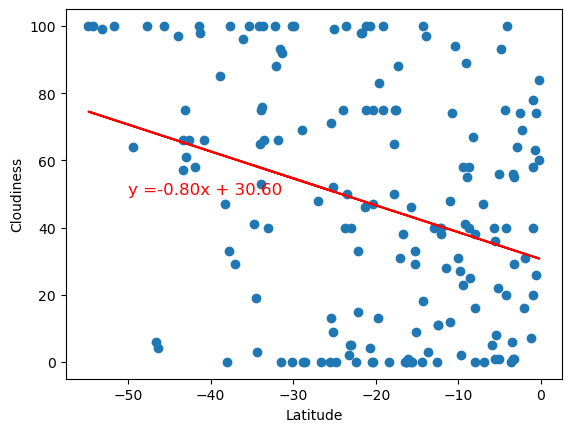

In [37]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 
There is a weak negative correlation between cloudiness and latitude on Northern Hemisphere.
There is a relatively weak negative correlation between cloudiness and latitude on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

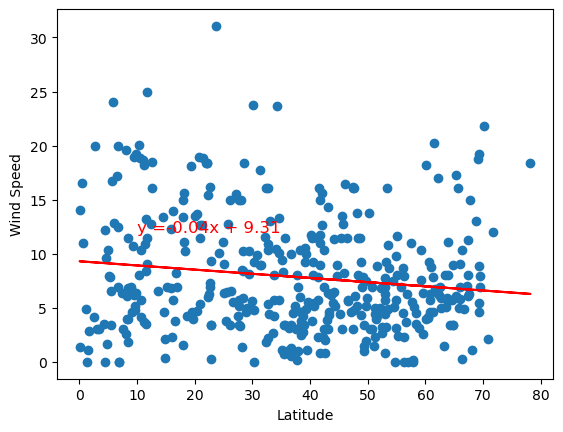

In [38]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

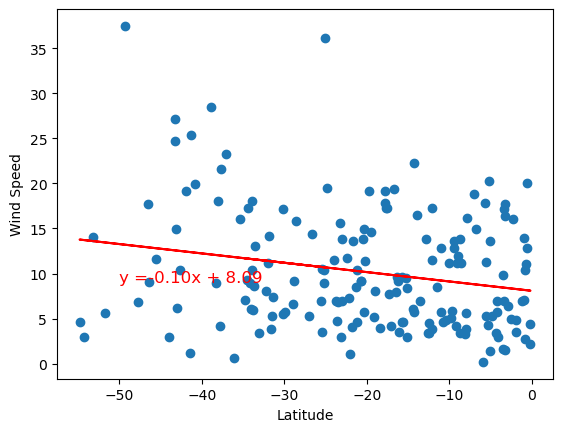

In [39]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 
There is a negative correltation between wind speed and latitude on Northern Hemisphere.
There is a weak negative correlation between wind speed and latitude on Southern Hemisphere.